In [33]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
import random

# Section (i)

In [16]:
train_words = ['winnipeg', 'manitoba', 'winnitoba', 'manipeg']
train_chars = sorted(list(set(''.join(train_words))))
train_chars = train_chars + ['EOW']
vocab_size = len(train_chars)
print(f'Size of the vocab is {vocab_size}.')

Size of the vocab is 12.


In [17]:
char_to_idx = {char: idx for idx, char in enumerate(train_chars)}
idx_to_char = {idx: char for idx, char in enumerate(train_chars)}
print("Size of the Dictionary:", len(idx_to_char))
print("char_to_idx:", char_to_idx)
print("idx_to_char:", idx_to_char)

Size of the Dictionary: 12
char_to_idx: {'a': 0, 'b': 1, 'e': 2, 'g': 3, 'i': 4, 'm': 5, 'n': 6, 'o': 7, 'p': 8, 't': 9, 'w': 10, 'EOW': 11}
idx_to_char: {0: 'a', 1: 'b', 2: 'e', 3: 'g', 4: 'i', 5: 'm', 6: 'n', 7: 'o', 8: 'p', 9: 't', 10: 'w', 11: 'EOW'}


In [18]:
def one_hot_encoder(char):
    vector = torch.zeros(len(train_chars))
    vector[char_to_idx[char]] = 1
    return vector

In [19]:
for char in train_chars:
    print(f"{char}: {one_hot_encoder(char)}")

print("="*50)
print("\nOne-hot encoding of 'winnpeg':")
word = "winnipeg"
for i in range(len(word)):
    current_char = word[i]
    next_char = word[i+1] if i+1 < len(word) else '<EOW>'
    print(f"One-hot for '{current_char}': {one_hot_encoder(current_char)}")

a: tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
b: tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
e: tensor([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
g: tensor([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])
i: tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
m: tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])
n: tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
o: tensor([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])
p: tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
t: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])
w: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
EOW: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

One-hot encoding of 'winnpeg':
One-hot for 'w': tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])
One-hot for 'i': tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])
One-hot for 'n': tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
One-hot for 'n': tensor(

# Section (ii)

In [20]:
def prepare_data (words):
    sequence = []

    for word in words:

        word_indices = [one_hot_encoder(c) for c in word]
        

        seq = word_indices + [one_hot_encoder('EOW')]

        sequence.append(torch.stack(seq))
    # print(seq,sep='\n')
    return sequence

In [21]:
sequences = prepare_data(train_words)

# print(f"Sequences shape: {sequences.shape}") 


for idx, chars in enumerate(sequences):
    print(f"sequence is '{train_words[idx]}': \n{chars}")
    print("-"*60)

sequence is 'winnipeg': 
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])
------------------------------------------------------------
sequence is 'manitoba': 
tensor([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 1., 0

In [151]:
class VanillaRNN (nn.Module):
    def __init__(self):
        super(VanillaRNN, self).__init__()
        self.vocab_size = vocab_size
        self.hidden_dim = 128

        self.rnn = nn.RNN(vocab_size, self.hidden_dim, batch_first=True, nonlinearity='tanh')
        self.fc1 = nn.Linear(self.hidden_dim, self.hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(self.hidden_dim, vocab_size)


    def forward(self, x, hidden):

        rnn_out, hidden = self.rnn(x, hidden)
        out = self.relu(self.fc1(rnn_out))
        out = self.fc2(out)

        return out, hidden
    
    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_dim)

In [152]:
device = torch.device('cpu')
print("Running on", device)
model = VanillaRNN()
hidden = model.init_hidden()
summary(model,  input_data=[torch.randn(1, 1, vocab_size).to(device), torch.zeros(1, 1, 128).to(device)])

Running on cpu


Layer (type:depth-idx)                   Output Shape              Param #
VanillaRNN                               [1, 1, 12]                --
├─RNN: 1-1                               [1, 1, 128]               18,176
├─Linear: 1-2                            [1, 1, 128]               16,512
├─ReLU: 1-3                              [1, 1, 128]               --
├─Linear: 1-4                            [1, 1, 12]                1,548
Total params: 36,236
Trainable params: 36,236
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.04
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.14
Estimated Total Size (MB): 0.15

In [163]:
def model_train(model, criterion, optimizer, MAX_EPOCHS):

    model.train()

    losses = []
    accuracies = []

    for epoch in range(MAX_EPOCHS):
        correct_char = 0
        total_loss = 0.0
        total_char = 0

        for seq in sequences:
            
            inputs, targets = seq[:-1].unsqueeze(0), torch.argmax(seq[1:], dim=1).unsqueeze(0)
            # print(inputs, targets)
            hidden = model.init_hidden()

            outputs, hidden = model(inputs, hidden)
            # print(outputs.data)
            loss = criterion(outputs.squeeze(0), targets.squeeze(0))
            total_loss += loss.item()

            _, predict = torch.max(outputs.data, 2)
            correct_char += (predict==targets).sum().item()
            total_char += targets.size(1)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(sequences)
        accuracy = correct_char / total_char
        losses.append(avg_loss)
        accuracies.append(accuracy)

        # if epoch % 1000 == 0:
    print(f'Epoch {epoch+1}, lr: {optimizer.param_groups[0]['lr']}, Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')

    return losses, accuracies
    

# iii)

## Adam Optimizer

In [164]:
model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.05)
loss_adam5, acc_adam5 = model_train(model, criterion, optimizer, 1000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
loss_adam1, acc_adam1 = model_train(model, criterion, optimizer, 1000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)
loss_adam05, acc_adam05 = model_train(model, criterion, optimizer, 1000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
loss_adam01, acc_adam01 = model_train(model, criterion, optimizer, 1000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)
loss_adam005, acc_adam005 = model_train(model, criterion, optimizer, 1000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
loss_adam001, acc_adam001 = model_train(model, criterion, optimizer, 1000)

Epoch 1000, lr: 0.05, Loss: 1.8160, Accuracy: 0.3125
Epoch 1000, lr: 0.01, Loss: 0.0875, Accuracy: 0.9375
Epoch 1000, lr: 0.005, Loss: 0.0876, Accuracy: 0.9375
Epoch 1000, lr: 0.001, Loss: 0.0878, Accuracy: 0.9375
Epoch 1000, lr: 0.0005, Loss: 0.0879, Accuracy: 0.9375
Epoch 1000, lr: 0.0001, Loss: 0.0892, Accuracy: 0.9375


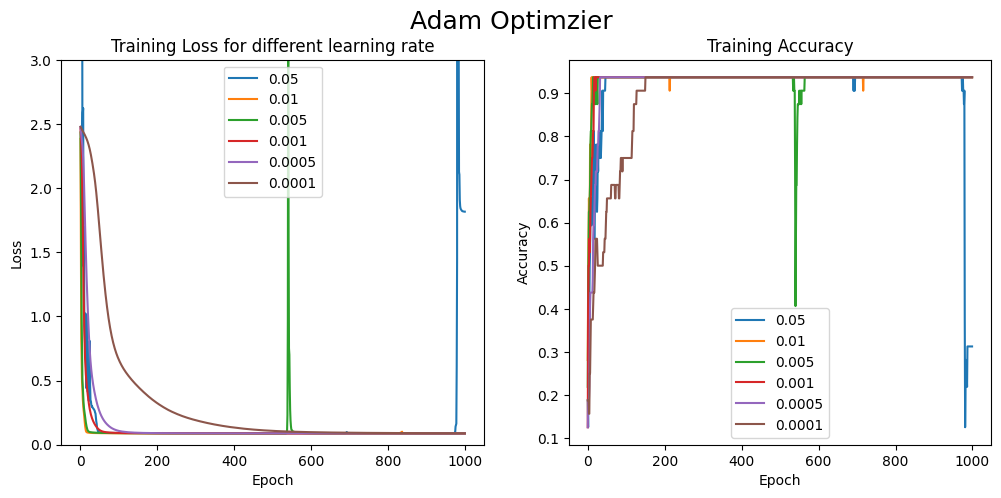

In [165]:
# Plot training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_adam5, label = '0.05')
plt.plot(loss_adam1, label = '0.01')
plt.plot(loss_adam05, label = '0.005')
plt.plot(loss_adam01, label = '0.001')
plt.plot(loss_adam005, label = '0.0005')
plt.plot(loss_adam001, label = '0.0001')
plt.title('Training Loss for different learning rate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0,3])
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_adam5, label = '0.05')
plt.plot(acc_adam1, label = '0.01')
plt.plot(acc_adam05, label = '0.005')
plt.plot(acc_adam01, label = '0.001')
plt.plot(acc_adam005, label = '0.0005')
plt.plot(acc_adam001, label = '0.0001')
plt.title('Training Accuracy for different learning rate')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.suptitle('Adam Optimzier', fontsize=18)
plt.show()

## RMSProbp Optimizer

In [166]:
model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.05)
loss_adam5, acc_adam5 = model_train(model, criterion, optimizer, 1000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.01)
loss_adam1, acc_adam1 = model_train(model, criterion, optimizer, 1000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.005)
loss_adam05, acc_adam05 = model_train(model, criterion, optimizer, 1000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.001)
loss_adam01, acc_adam01 = model_train(model, criterion, optimizer, 1000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.0005)
loss_adam005, acc_adam005 = model_train(model, criterion, optimizer, 1000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.RMSprop(model.parameters(), lr=0.0001)
loss_adam001, acc_adam001 = model_train(model, criterion, optimizer, 1000)

Epoch 1000, lr: 0.05, Loss: 1.4773, Accuracy: 0.4062
Epoch 1000, lr: 0.01, Loss: 0.0901, Accuracy: 0.9375
Epoch 1000, lr: 0.005, Loss: 0.3203, Accuracy: 0.9375
Epoch 1000, lr: 0.001, Loss: 0.0879, Accuracy: 0.9375
Epoch 1000, lr: 0.0005, Loss: 0.0891, Accuracy: 0.9375
Epoch 1000, lr: 0.0001, Loss: 0.0891, Accuracy: 0.9375


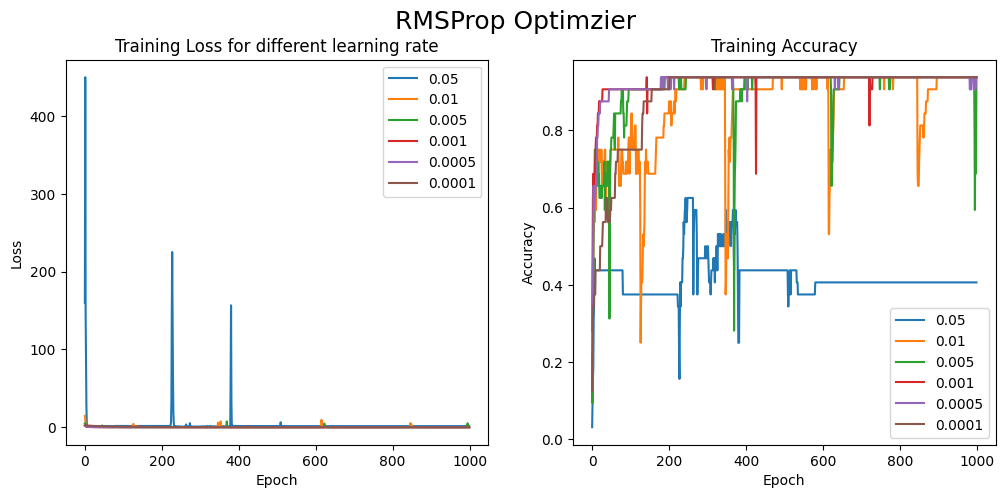

In [167]:
# Plot training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_adam5, label = '0.05')
plt.plot(loss_adam1, label = '0.01')
plt.plot(loss_adam05, label = '0.005')
plt.plot(loss_adam01, label = '0.001')
plt.plot(loss_adam005, label = '0.0005')
plt.plot(loss_adam001, label = '0.0001')
plt.title('Training Loss for different learning rate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_adam5, label = '0.05')
plt.plot(acc_adam1, label = '0.01')
plt.plot(acc_adam05, label = '0.005')
plt.plot(acc_adam01, label = '0.001')
plt.plot(acc_adam005, label = '0.0005')
plt.plot(acc_adam001, label = '0.0001')
plt.title('Training Accuracy for different learning rate')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.suptitle('RMSProp Optimzier', fontsize=18)
plt.show()

## SGD Optimizer

In [168]:
model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)
loss_adam5, acc_adam5 = model_train(model, criterion, optimizer, 5000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_adam1, acc_adam1 = model_train(model, criterion, optimizer, 5000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)
loss_adam05, acc_adam05 = model_train(model, criterion, optimizer, 5000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)
loss_adam01, acc_adam01 = model_train(model, criterion, optimizer, 5000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0005)
loss_adam005, acc_adam005 = model_train(model, criterion, optimizer, 5000)

model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
loss_adam001, acc_adam001 = model_train(model, criterion, optimizer, 5000)

Epoch 5000, lr: 0.05, Loss: 0.0904, Accuracy: 0.9375
Epoch 5000, lr: 0.01, Loss: 0.0914, Accuracy: 0.9375
Epoch 5000, lr: 0.005, Loss: 0.0922, Accuracy: 0.9375
Epoch 5000, lr: 0.001, Loss: 0.2630, Accuracy: 0.9375
Epoch 5000, lr: 0.0005, Loss: 0.9895, Accuracy: 0.7500
Epoch 5000, lr: 0.0001, Loss: 2.3374, Accuracy: 0.3125


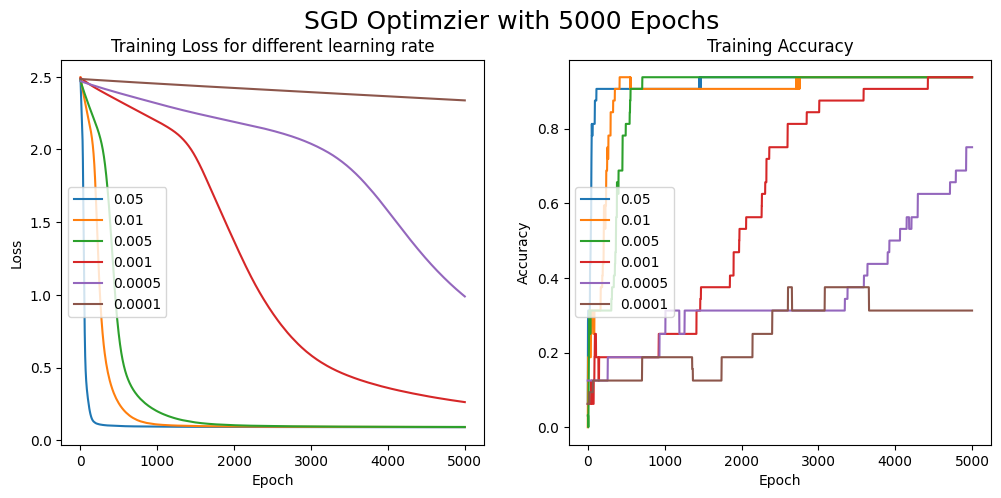

In [169]:
# Plot training curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(loss_adam5, label = '0.05')
plt.plot(loss_adam1, label = '0.01')
plt.plot(loss_adam05, label = '0.005')
plt.plot(loss_adam01, label = '0.001')
plt.plot(loss_adam005, label = '0.0005')
plt.plot(loss_adam001, label = '0.0001')
plt.title('Training Loss for different learning rate')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(acc_adam5, label = '0.05')
plt.plot(acc_adam1, label = '0.01')
plt.plot(acc_adam05, label = '0.005')
plt.plot(acc_adam01, label = '0.001')
plt.plot(acc_adam005, label = '0.0005')
plt.plot(acc_adam001, label = '0.0001')
plt.title('Training Accuracy for different learning rate')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.suptitle('SGD Optimzier with 5000 Epochs', fontsize=18)
plt.show()

## Adam Optimizer (Weight Decay)

In [170]:
weight_decays = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]

losses = np.zeros((len(weight_decays), 1000))
acc = np.zeros((len(weight_decays), 1000))

for idx, value in enumerate(weight_decays):
    model = VanillaRNN()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=value)
    print(f"\nWeight Decay: {value}")
    loss_adam, acc_adam = model_train(model, criterion, optimizer, 1000)

    losses[idx,:] = loss_adam
    acc[idx,:] = acc_adam


Weight Decay: 1e-09
Epoch 1000, lr: 0.01, Loss: 0.0878, Accuracy: 0.9375

Weight Decay: 1e-08
Epoch 1000, lr: 0.01, Loss: 0.0873, Accuracy: 0.9375

Weight Decay: 1e-07
Epoch 1000, lr: 0.01, Loss: 0.0875, Accuracy: 0.9375

Weight Decay: 1e-06
Epoch 1000, lr: 0.01, Loss: 0.0893, Accuracy: 0.9375

Weight Decay: 1e-05
Epoch 1000, lr: 0.01, Loss: 0.0903, Accuracy: 0.9375

Weight Decay: 0.0001
Epoch 1000, lr: 0.01, Loss: 0.0935, Accuracy: 0.9375

Weight Decay: 0.001
Epoch 1000, lr: 0.01, Loss: 0.0915, Accuracy: 0.9375


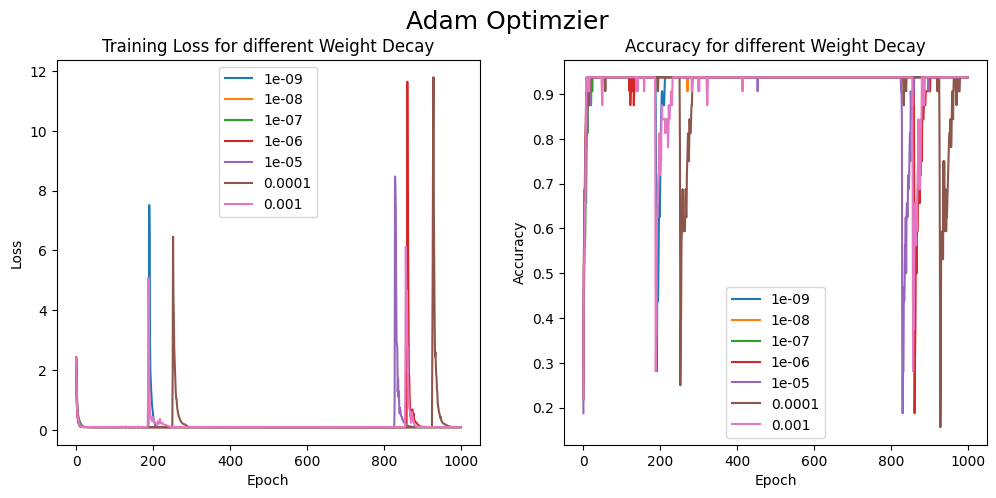

In [171]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses.T)
plt.legend((1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3))
plt.title('Training Loss for different Weight Decay')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(acc.T)
plt.legend((1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3))
plt.title('Accuracy for different Weight Decay')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.suptitle('Adam Optimzier', fontsize=18)
plt.show()

In [161]:
def gen_new_words (model):
    random_start_char = random.choice([c for c in char_to_idx if c != 'EOW'])
    input_char = one_hot_encoder(random_start_char).unsqueeze(0).unsqueeze(0)
    hidden = model.init_hidden()

    
    gen_word = random_start_char
    
    while True:

        output, hidden = model(input_char, hidden)
        # print(output)
        probs = (torch.exp(output)/torch.sum(torch.exp(output))).squeeze().detach().numpy()
        # print(probs)
        next_char_idx = np.random.choice(len(probs), p=probs)
        next_char = idx_to_char[next_char_idx]
        
        
        if next_char == 'EOW':
            break
        
        gen_word += next_char
        input_char = one_hot_encoder(next_char).unsqueeze(0).unsqueeze(0)
    


    return gen_word


In [173]:
model = VanillaRNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-8)
loss_adam, acc_adam = model_train(model, criterion, optimizer, 1000)

Epoch 1000, lr: 0.01, Loss: 0.0873, Accuracy: 0.9375


In [196]:
new_words = np.array([])
for i in range(50):
    new_words = np.append(new_words, gen_new_words(model))

print("Generated Words:")
print(new_words)

Generated Words:
['eanitoba' 'banipeg' 'winnitoba' 'aanitoba' 'gnntpeg' 'ianipeg' 'ianipeg'
 'aanipeg' 'tpnitoba' 'winnitoba' 'aanipeg' 'pai' 'pba' 'eanitoba'
 'tpnitoba' 'g' 'ianitoba' 'winnipeg' 'banitoba' 'eanitoba' 'pba'
 'ganipeg' 'winnitoba' 'manipeg' 'winnipeg' 'onintpeg' 'g' 'onitoeg'
 'banipeg' 'tpnipeg' 'manipeg' 'eanipeg' 'banipeg' 'nintpeg' 'manipeg'
 'winnipeg' 'ianipeg' 'aanitoba' 'winnipeg' 'pai' 'g' 'winnipeg' 'aanipeg'
 'paa' 'aanipeg' 'winnipeg' 'manipeg' 'manipeg' 'winnipeg' 'pai']
